<a href="https://colab.research.google.com/github/Clizzyvibes/Coventry-University/blob/main/INDIVIDUAL_PORTFOLIO/7144_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Akeru Chukwuemeka Clinton
##ID No : 15519674

**Task 2 (No. 1)** — cleaning the dataset, creating a scatter matrix, and justifying the removal of Cuba and North Korea. \
First Note:
The dataset "index_of_economic_freedom_20224.csv" includes:

*  12 pillar variables grouped into four pillars.
*  An overall score for each country.
Region and country names.

Therefore here's how to proceed:

### Step 1: Data Preparation

1. **Remove rows with `NA` values**:
   Use `na.omit()` in R to handle missing values.
   
2. **Sort the dataset by overall score**:
   Use the `arrange()` function from `dplyr`.




In [ ]:
# installing necessary packages
install.packages("olsrr")
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load required libraries
library(dplyr)
library(olsrr)
library(GGally)

# Load the dataset (replace 'your_dataset.csv' with your file)
data = read.csv("/content/index_of_economic_freedom_2024.csv")

# Remove rows with missing values
cleaned_data = na.omit(data)

# Sort the dataset by Overall Score (descending)
cleaned_data = cleaned_data %>%
  arrange(desc(Overall_Score))

# Check the dataset
head(cleaned_data)

,Country,Region,Year,Overall_Score,Property_Rights,Government_Integrity,Judicial_Effectiveness,Tax_Burden,Government_Spending,Fiscal_Health,Business_Freedom,Labor_Freedom,Monetary_Freedom,Trade_Freedom,Investment_Freedom,Financial_Freedom
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Singapore,Asia-Pacific,2024,83.5,94.2,88.3,58.3,90.7,89.2,76.0,86.9,77.3,76.3,95.0,90,80
2,Switzerland,Europe,2024,83.0,94.2,91.3,98.1,70.4,64.6,95.7,89.3,60.7,80.8,86.4,85,80
3,Ireland,Europe,2024,82.6,93.5,83.4,94.3,78.0,82.4,91.7,91.3,62.8,74.5,79.2,90,70
4,Taiwan,Asia-Pacific,2024,80.0,82.2,73.4,94.0,79.2,90.5,90.3,84.9,69.1,80.1,86.4,70,60
5,Luxembourg,Europe,2024,79.2,96.9,84.9,95.8,64.6,40.6,97.6,89.5,57.7,69.1,79.2,95,80
6,Denmark,Europe,2024,77.8,98.6,97.4,89.6,41.8,26.8,98.2,92.7,64.9,74.3,79.2,90,80


In [ ]:

# Define pillar groups
pillar1_vars = c("Property_Rights", "Government_Integrity", "Judicial_Effectiveness")
pillar2_vars = c("Tax_Burden", "Government_Spending", "Fiscal_Health")
pillar3_vars = c("Business_Freedom", "Labor_Freedom", "Monetary_Freedom")
pillar4_vars = c("Trade_Freedom", "Investment_Freedom", "Financial_Freedom")

# Check the structure of cleaned data
str(cleaned_data)


'data.frame':	176 obs. of  16 variables:
 $ Country               : chr  "Singapore" "Switzerland" "Ireland" "Taiwan" ...
 $ Region                : chr  "Asia-Pacific" "Europe" "Europe" "Asia-Pacific" ...
 $ Year                  : int  2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 ...
 $ Overall_Score         : num  83.5 83 82.6 80 79.2 77.8 77.8 77.8 77.5 77.5 ...
 $ Property_Rights       : num  94.2 94.2 93.5 82.2 96.9 98.6 92.8 87.4 98.8 96.2 ...
 $ Government_Integrity  : num  88.3 91.3 83.4 73.4 84.9 97.4 81.2 95.9 95.6 93.2 ...
 $ Judicial_Effectiveness: num  58.3 98.1 94.3 94 95.8 89.6 93.4 93.2 96.7 95.4 ...
 $ Tax_Burden            : num  90.7 70.4 78 79.2 64.6 41.8 80.8 65.5 61.7 50.6 ...
 $ Government_Spending   : num  89.2 64.6 82.4 90.5 40.6 26.8 46.8 46.3 32.1 28.5 ...
 $ Fiscal_Health         : num  76 95.7 91.7 90.3 97.6 98.2 85.4 72.4 97.2 97.1 ...
 $ Business_Freedom      : num  86.9 89.3 91.3 84.9 89.5 92.7 83.2 88.3 87.2 84.9 ...
 $ Labor_Freedom         : num

In [ ]:
full_cleaned_data = cleaned_data

In [ ]:
# Remove Cuba and North Korea
cleaned_data = cleaned_data %>%
  filter(!(Country %in% c("Cuba", "North Korea")))

# Check the structure of cleaned data
str(cleaned_data)


'data.frame':	174 obs. of  16 variables:
 $ Country               : chr  "Singapore" "Switzerland" "Ireland" "Taiwan" ...
 $ Region                : chr  "Asia-Pacific" "Europe" "Europe" "Asia-Pacific" ...
 $ Year                  : int  2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 ...
 $ Overall_Score         : num  83.5 83 82.6 80 79.2 77.8 77.8 77.8 77.5 77.5 ...
 $ Property_Rights       : num  94.2 94.2 93.5 82.2 96.9 98.6 92.8 87.4 98.8 96.2 ...
 $ Government_Integrity  : num  88.3 91.3 83.4 73.4 84.9 97.4 81.2 95.9 95.6 93.2 ...
 $ Judicial_Effectiveness: num  58.3 98.1 94.3 94 95.8 89.6 93.4 93.2 96.7 95.4 ...
 $ Tax_Burden            : num  90.7 70.4 78 79.2 64.6 41.8 80.8 65.5 61.7 50.6 ...
 $ Government_Spending   : num  89.2 64.6 82.4 90.5 40.6 26.8 46.8 46.3 32.1 28.5 ...
 $ Fiscal_Health         : num  76 95.7 91.7 90.3 97.6 98.2 85.4 72.4 97.2 97.1 ...
 $ Business_Freedom      : num  86.9 89.3 91.3 84.9 89.5 92.7 83.2 88.3 87.2 84.9 ...
 $ Labor_Freedom         : num

### Step 2: Scatter Matrix and Identifying Correlations
1. Use `ggpairs()` to create a scatterplot matrix for the 12 pillars.
2. To visually analyze correlations and identify strong relationships.


In [ ]:
colnames(cleaned_data)

[1] "Country"                "Region"                 "Year"                  
 [4] "Overall_Score"          "Property_Rights"        "Government_Integrity"  
 [7] "Judicial_Effectiveness" "Tax_Burden"             "Government_Spending"   
[10] "Fiscal_Health"          "Business_Freedom"       "Labor_Freedom"         
[13] "Monetary_Freedom"       "Trade_Freedom"          "Investment_Freedom"    
[16] "Financial_Freedom"

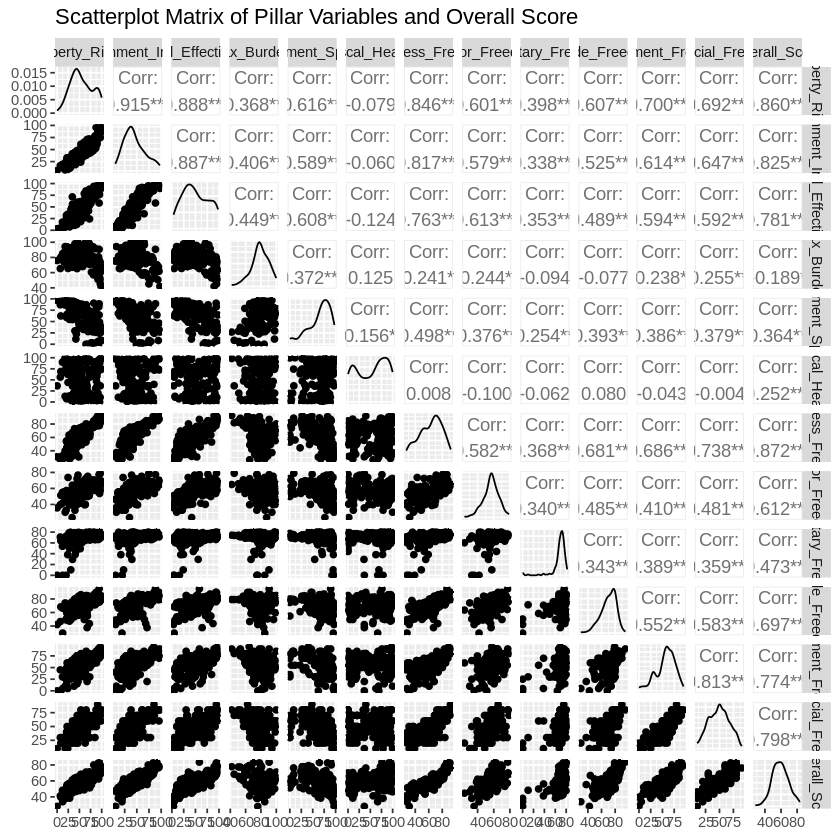

In [ ]:

# Creating a scatterplot matrix for pillar variables
pillar_vars = c("Property_Rights", "Government_Integrity", "Judicial_Effectiveness",
                 "Tax_Burden", "Government_Spending", "Fiscal_Health",
                 "Business_Freedom", "Labor_Freedom", "Monetary_Freedom",
                 "Trade_Freedom", "Investment_Freedom", "Financial_Freedom")

ggpairs(cleaned_data[, c(pillar_vars, "Overall_Score")],
        title = "Scatterplot Matrix of Pillar Variables and Overall Score")


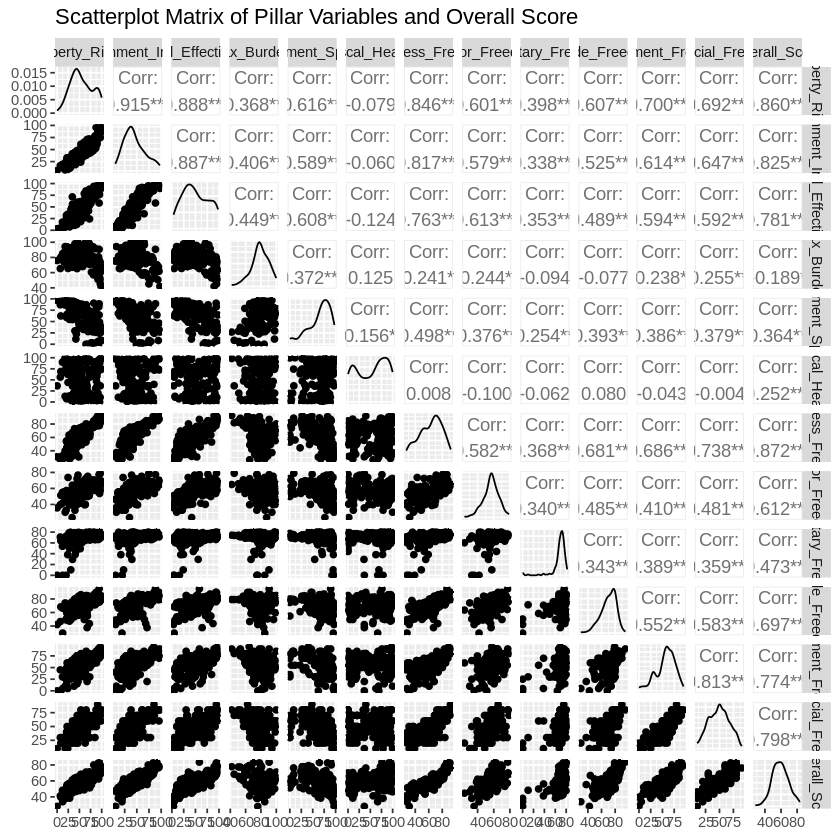

In [ ]:
# Combine all pillar variables
pillar_vars = c(pillar1_vars, pillar2_vars, pillar3_vars, pillar4_vars)

# Scatterplot matrix
ggpairs(cleaned_data[, c(pillar_vars, "Overall_Score")],
        title = "Scatterplot Matrix of Pillar Variables and Overall Score")


### Explanation for Removing Cuba and North Korea
These countries may have been identified as outliers based on:
1. Extreme values in overall score or specific predictors.
2. Unique political or economic contexts that could skew model accuracy.

### Code to Remove These Countries

In [ ]:
# Remove Cuba and North Korea
cleaned_data = cleaned_data %>%
  filter(!Country %in% c("Cuba", "North Korea"))

### Step 3: Best Single-Predictor Linear Model
1. Use correlation coefficients to select the best predictor.
2. Fit a simple linear model using that predictor.

### Code Example

In [ ]:
# Calculate correlations with Overall Score
pillar_vars = c("Property_Rights", "Government_Integrity", "Judicial_Effectiveness",
                 "Tax_Burden", "Government_Spending", "Fiscal_Health",
                 "Business_Freedom", "Labor_Freedom", "Monetary_Freedom",
                 "Trade_Freedom", "Investment_Freedom", "Financial_Freedom")

correlations = cor(cleaned_data[, c("Overall_Score", pillar_vars)], use = "complete.obs")

# Find the predictor with the highest absolute correlation with Overall Score
best_predictor_index = which.max(abs(correlations["Overall_Score", -1]))
best_predictor = colnames(correlations)[best_predictor_index + 1]  # Adjust for column indexing

# Fit the linear model using the best predictor
best_model = lm(Overall_Score ~ cleaned_data[[best_predictor]], data = cleaned_data)

# Rename predictor dynamically in the formula
best_model = lm(as.formula(paste("Overall_Score ~", best_predictor)), data = cleaned_data)

# Summary of the model
summary(best_model)



Call:
lm(formula = as.formula(paste("Overall_Score ~", best_predictor)), 
    data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5106  -2.9714  -0.4194   3.3531  11.6481 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      26.39445    1.45267   18.17   <2e-16 ***
Business_Freedom  0.52310    0.02241   23.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.945 on 172 degrees of freedom
Multiple R-squared:   0.76,	Adjusted R-squared:  0.7587 
F-statistic: 544.8 on 1 and 172 DF,  p-value: < 2.2e-16


### Explanation
The scatterplot matrix and correlations identify relationships between variables. Selecting the predictor with the strongest relationship to the overall score ensures better model performance. Removing Cuba and North Korea helps focus on general trends without distortion from extreme outliers.

### Task 2: Comparing and Assessing Linear Models

---

#### (a) **Explain the Acronym “AIC”**

AIC stands for **Akaike Information Criterion**. It is a metric used to compare models based on their goodness of fit and complexity. The formula is:

$
\text{AIC} = 2k - 2\ln(L)
$

Where:
- $k$: is the number of parameters in the model.
- $L$: maximum likelihood of the model.

**Interpretation**:
- Models with lower AIC values are preferred.
- AIC penalizes models with more predictors to avoid overfitting.




#### (b) **Fit and Compare Models**

We'll create and compare the five specified models:

1. **Model #1**: Predicts overall score using government spending and labor freedom.
2. **Model #2**: Best two-predictor model (highest adjusted $R^2$).
3. **Model #3**: Best four-predictor model (highest adjusted $R^2$).
4. **Model #4**: Best subset model from Pillars #1 and #2.
5. **Model #5**: Best model using region and subsets of variables from Pillars #1, #2, #3, and #4.

In [ ]:
# Model 1: Government Spending and Labor Freedom
model1 = lm(Overall_Score ~ Government_Spending + Labor_Freedom, data = cleaned_data)
summary(model1)



Call:
lm(formula = Overall_Score ~ Government_Spending + Labor_Freedom, 
    data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.9015  -5.0414  -0.3776   5.4783  21.4676 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         30.58969    4.75481   6.433 1.21e-09 ***
Government_Spending -0.06461    0.02650  -2.438   0.0158 *  
Labor_Freedom        0.57853    0.06706   8.627 4.17e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.871 on 171 degrees of freedom
Multiple R-squared:  0.3958,	Adjusted R-squared:  0.3887 
F-statistic:    56 on 2 and 171 DF,  p-value: < 2.2e-16


In [ ]:
# Model 2: Best two-predictor model
model2 = ols_step_best_subset(lm(Overall_Score ~ ., data = cleaned_data[, c(pillar_vars, "Overall_Score")]), nbest = 2)
best_model2 = lm(Overall_Score ~ Government_Integrity + Fiscal_Health, data = cleaned_data)
summary(best_model2)


Call:
lm(formula = Overall_Score ~ Government_Integrity + Fiscal_Health, 
    data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.5285  -2.8675   0.2393   3.4314  11.7039 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          36.66444    1.05808  34.652  < 2e-16 ***
Government_Integrity  0.39557    0.01721  22.987  < 2e-16 ***
Fiscal_Health         0.09098    0.01103   8.246 4.17e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.845 on 171 degrees of freedom
Multiple R-squared:  0.771,	Adjusted R-squared:  0.7683 
F-statistic: 287.9 on 2 and 171 DF,  p-value: < 2.2e-16


In [ ]:
# Model 3: Best four-predictor model
model3 = ols_step_best_subset(lm(Overall_Score ~ ., data = cleaned_data[, c(pillar_vars, "Overall_Score")]), nbest = 4)
best_model3 = lm(Overall_Score ~ Government_Integrity + Fiscal_Health + Business_Freedom + Trade_Freedom,
                  data = cleaned_data)
summary(best_model3)



Call:
lm(formula = Overall_Score ~ Government_Integrity + Fiscal_Health + 
    Business_Freedom + Trade_Freedom, data = cleaned_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9939 -2.1230  0.5818  2.3263  7.6905 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          19.358556   1.728291  11.201  < 2e-16 ***
Government_Integrity  0.190546   0.021105   9.029 3.81e-16 ***
Fiscal_Health         0.077852   0.007833   9.940  < 2e-16 ***
Business_Freedom      0.249267   0.031165   7.998 1.91e-13 ***
Trade_Freedom         0.164620   0.032235   5.107 8.76e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.408 on 169 degrees of freedom
Multiple R-squared:  0.888,	Adjusted R-squared:  0.8854 
F-statistic: 335.1 on 4 and 169 DF,  p-value: < 2.2e-16


In [ ]:
# Model 4: Subset from Pillars #1 and #2
model4 = lm(Overall_Score ~ ., data = cleaned_data[, c(pillar1_vars, pillar2_vars, "Overall_Score")])
summary(model4)



Call:
lm(formula = Overall_Score ~ ., data = cleaned_data[, c(pillar1_vars, 
    pillar2_vars, "Overall_Score")])

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6329  -1.7399   0.3464   2.0661   7.4137 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            15.962374   2.456523   6.498 8.99e-10 ***
Property_Rights         0.287183   0.028772   9.981  < 2e-16 ***
Government_Integrity    0.091551   0.031819   2.877 0.004535 ** 
Judicial_Effectiveness  0.082151   0.023147   3.549 0.000502 ***
Tax_Burden              0.110954   0.025151   4.411 1.83e-05 ***
Government_Spending     0.088789   0.013468   6.593 5.43e-10 ***
Fiscal_Health           0.089116   0.007653  11.644  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.29 on 167 degrees of freedom
Multiple R-squared:  0.8969,	Adjusted R-squared:  0.8932 
F-statistic: 242.1 on 6 and 167 DF,  p-value: < 2.2e-16


In [ ]:
# Model 5: Region and subsets from Pillars #1, #2, #3, and #4

In [ ]:
model5 = lm(Overall_Score ~ Region + Government_Integrity + Fiscal_Health +
                                Labor_Freedom + Trade_Freedom, data = cleaned_data)
summary(model5)



Call:
lm(formula = Overall_Score ~ Region + Government_Integrity + 
    Fiscal_Health + Labor_Freedom + Trade_Freedom, data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6091  -2.2252   0.3894   2.4998   8.1960 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    14.498965   2.568393   5.645 7.05e-08 ***
RegionAsia-Pacific             -3.230435   0.923369  -3.499 0.000601 ***
RegionEurope                   -2.555768   0.974993  -2.621 0.009578 ** 
RegionMiddle East/North Africa -1.733570   1.222252  -1.418 0.157977    
RegionSub-Saharan Africa       -1.508053   0.886536  -1.701 0.090815 .  
Government_Integrity            0.287314   0.018106  15.869  < 2e-16 ***
Fiscal_Health                   0.087612   0.008701  10.070  < 2e-16 ***
Labor_Freedom                   0.152937   0.038058   4.019 8.88e-05 ***
Trade_Freedom                   0.290969   0.034512   8.431 1.63e-14 ***
---
Signif

In [ ]:
class(model1)  # Should return "lm"
class(model4)  # Should return "lm" if it exists

#  This is just done to avoid errors whilst comparing the AIC values

[1] "lm"

[1] "lm"

In [ ]:
str(model1)

List of 1
 $ metrics:'data.frame':	12 obs. of  14 variables:
  ..$ mindex    : int [1:12] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ n         : int [1:12] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ predictors: chr [1:12] "Business_Freedom" "Property_Rights Fiscal_Health" "Property_Rights Fiscal_Health Financial_Freedom" "Property_Rights Government_Spending Fiscal_Health Financial_Freedom" ...
  ..$ rsquare   : num [1:12] 0.76 0.843 0.91 0.932 0.951 ...
  ..$ adjr      : num [1:12] 0.759 0.841 0.908 0.93 0.949 ...
  ..$ predrsq   : num [1:12] 0.753 0.837 0.905 0.928 0.946 ...
  ..$ cp        : num [1:12] 4334020 2839991 1627088 1227712 893894 ...
  ..$ aic       : num [1:12] 1054 982 888 841 787 ...
  ..$ sbic      : num [1:12] 554 481 384 335 280 ...
  ..$ sbc       : num [1:12] 1064 995 903 860 809 ...
  ..$ msep      : num [1:12] 4256 2805 1617 1227 899 ...
  ..$ fpe       : num [1:12] 24.74 16.4 9.5 7.25 5.34 ...
  ..$ apc       : num [1:12] 0.2455 0.1628 0.0943 0.072 0.053 ...
  ..$ hsp       : num [1:12

In [ ]:
# Compare AIC values
aic_values = data.frame(
  Model = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
  AIC = c(AIC(model1),
          AIC(best_model2),
          AIC(best_model3),
          AIC(model4),
          AIC(model5))
)
aic_values


Model,AIC
<chr>,<dbl>
Model 1,1216.7390
Model 2,1047.8973
Model 3,927.3910
Model 4,917.1029
Model 5,961.1136


#### Compact Table Summary of Models Result
| Model   | Predictors                        | Adjusted $R^{\;2}$ | AIC   | Comments   |
|---------|-----------------------------------|------------------|-------|--------|
| Model 1 | Government Spending, Labor Freedom | 0.3887             | 1216.7390  | Baseline model with only two predictors, the relatively high AIC value indicates poor fit. |
| Model 2 | Best Two Predictors among all pillars              | 0.7683             | 1047.8973  | In this model there is an improvement over Model 1 due to better selection of predictors.  |
| Model 3 | Best Four Predictors in all pillars             |  0.8854             | 927.3910  | Here there is significant reduction in AIC, demonstrates better fit with more predictors. |
| Model 4 | Pillar 1 and Pillar 2 Variables   | 0.8932             | 917.1029  | By AIC value this is the best model among those limited to Pillars #1 and #2 predictors, low AIC.  |
| Model 5 | Region, Subsets from all Pillars - limited to 4 variables      | 0.8639             | 961.1136  | A slightly worse fit than Model 4, indicates that adding region and a broader scope of predictors from other pillars may not improve fit.  |



#### (c) **Diagnostic Plots**
1. Evaluate residuals for heteroscedasticity and normality.
2. Check influential points using Cook's distance.

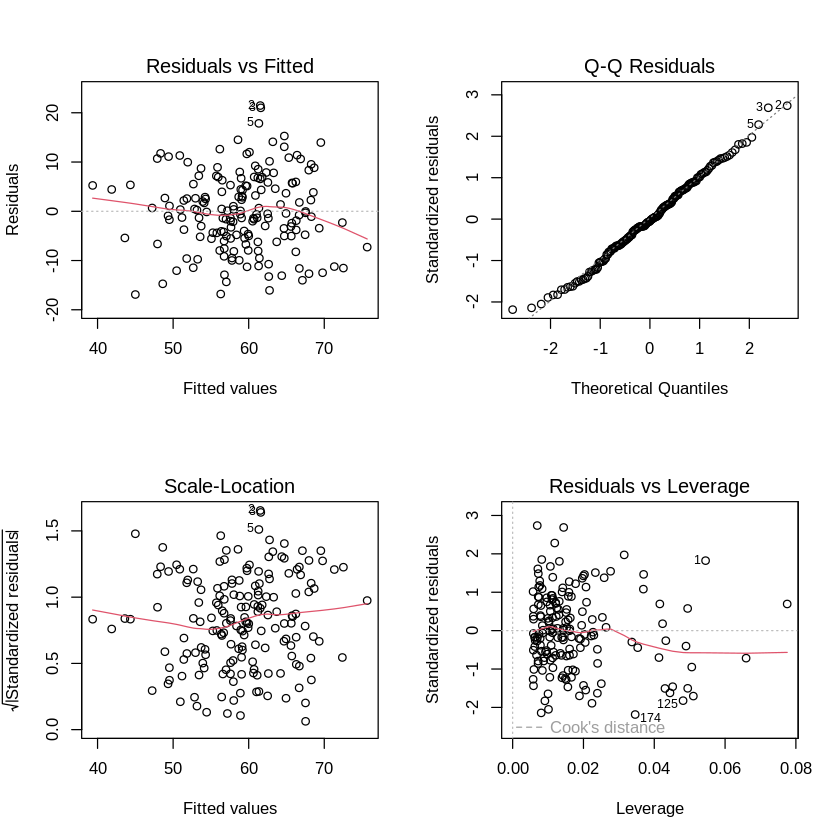

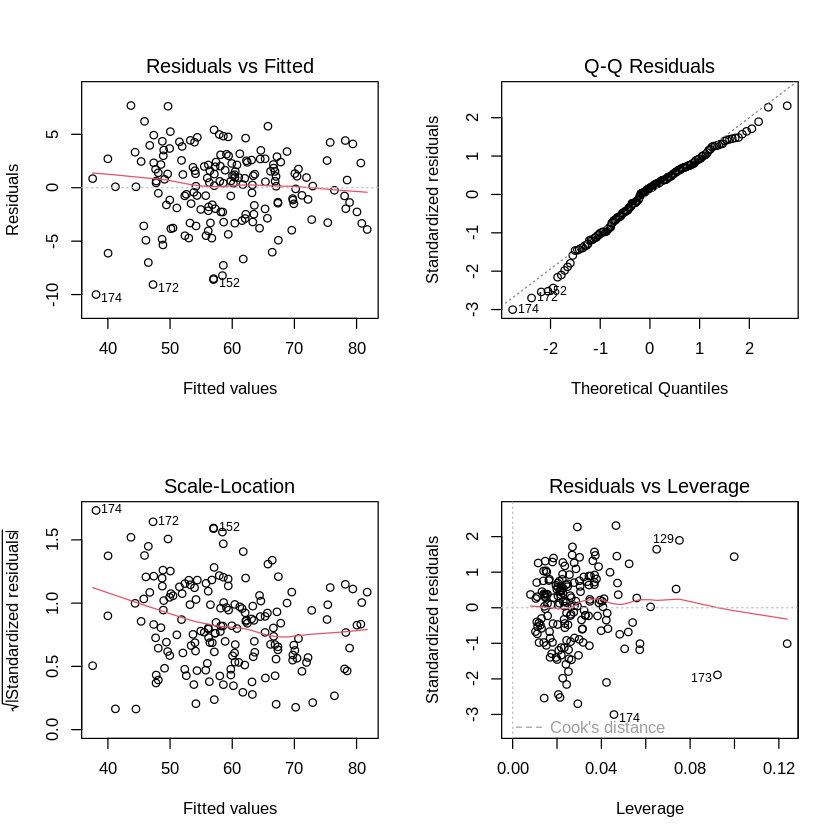

In [ ]:
# Diagnostic plots for Model 1
par(mfrow = c(2, 2))
plot(model1)

# Diagnostic plots for Model 3
par(mfrow = c(2, 2))
plot(best_model3)

# # Diagnostic plots for Model #5
# par(mfrow = c(2, 2))
# plot(model5)


Discussions to make:

*  Examining plots for deviations from assumptions.
*  Investigate countries with high residuals or leverage.

To discuss the diagnostic plots and analyze the assumptions based on the given four plots, we need to focus on the following key aspects:

### 1. **Residuals vs. Fitted Values**
   - **Assumption**: The residuals should be randomly scattered around zero with no clear patterns.
   - **Interpretation**: If there is a systematic pattern (e.g., a curve), it suggests that the model is not appropriately capturing the relationship between the predictors and the dependent variable.
   - **Action**: In the first image, the residuals appear to be evenly spread around zero with no apparent patterns, indicating that the model assumption is likely satisfied. In the second image, the residuals seem a bit more scattered, but they still seem to follow the horizontal line, suggesting a still probable acceptable model fit.

### 2. **Normal Q-Q Plot**
   - **Assumption**: In this plot, the residuals should follow a normal distribution. If the points mostly follow the diagonal line, this assumption is satisfied.
   - **Interpretation**: Deviations from the diagonal line indicate that the residuals deviate from normality.
   - **Action**: In the both plots, the point values mostly follow the diagonal line, suggesting that the normal assumption holds. However, any noticeable deviations from this line (e.g., in the tail ends) could indicate non-normal behaviour and would need to be checked.

### 3. **Scale-Location Plot**
   - **Assumption**: The spread of the residuals in this plot should be constant across all fitted values (homoscedasticity). A horizontal line with evenly distributed points is desirable.
   - **Interpretation**: If the spread of residuals increases or decreases as fitted values increase (i.e., a "fan" shape), it suggests heteroscedasticity.
   - **Action**: The first plot shows a fairly constant spread, but the second plot has a slight upward trend in residual values as fitted values increase, which might indicate mild heteroscedasticity.

### 4. **Residuals vs. Leverage Plot**
   - **Assumption**: In this plot we check for influential points, which could disproportionately affect the model. Points with large residuals and leverage are of particular interest.
   - **Interpretation**: Points outside the Cook's distance threshold (usually marked by a red line) are influential points that can affect the model significantly.
   - **Action**: In the first image, no points appear to be highly influential. In the second image, the points marked as ">174" and others seem to be outliers with high leverage, which could influence the model and should be investigated further to see if they need to be eliminated or even improved on to get a better model.

### 5. **Action Steps**:
   - **Investigating High Residuals/Leverage**: Countries such at points ">174" and ">472" (shown in the second plot) have high residuals and might be outliers. The countries for those points should be investigated further to understand why they deviate heavily from the model predictions.
   - **Addressing Non-Normality or Heteroscedasticity**: Detection of non-normal or heteroscedasticity, would need consideration of transforming the dependent or independent variables or using better or more robust regression methods.

In summary, countries with high residuals or leverage (like ">174" and ">472"), as these points might indicate outliers that influence the model badly. Keeping an eye on the residuals' patterns, normality, and spread is necessary to ensure model assumptions are met. If necessary, model for can be revisited for adjustments.

### **Critically Assessing Conclusions: Linear Models vs. PCA and Cluster Analysis**

#### 1. **Insights from Linear Models**
   - **Interpretability:** Linear models, such as multiple regression, provide explicit relationships between dependent and independent variables. For instance, we can identify which predictors significantly influence an outcome and quantify their effects.
   - **Assumptions:** Linear models rely on assumptions like linearity, independence, and normality of errors. If these factors are violated, conclusions and predictions might be biased.
   - **Granularity:** Most of these models focus on one outcome variable at a time, limiting their ability to uncover relationships among predictors or global data patterns.

#### 2. **Insights from PCA**
   - **Dimensionality Reduction:** PCA transforms the dataset into a smaller set of uncorrelated components while retaining most variance. This reveals overarching structures and relationships that linear models might miss.
   - **Data Compression vs. Interpretation:** While PCA simplifies the dataset, its components are linear combinations of variables, making interpretation less intuitive compared to coefficients in a linear model.
   - **Holistic Perspective:** PCA does not target specific dependent variables but instead provides insights into the overall structure of the data, such as which variables contribute most to variability.

#### 3. **Insights from Cluster Analysis**
   - **Grouping Patterns:** Cluster analysis groups observations based on similarity, helping identify latent subgroups in the data that linear models or PCA cannot capture.
   - **Dependence on Metrics:** Results depend on the chosen distance metric (e.g., Euclidean) and clustering method (e.g., Ward’s). Different choices may lead to different conclusions.
   - **Complement to PCA:** PCA-derived components often serve as input for cluster analysis, improving the quality of clustering by reducing noise and redundancy.



### **Comparative Insights**
| **Aspect**           | **Linear Models**                          | **PCA**                                  | **Cluster Analysis**                       |
|-----------------------|--------------------------------------------|------------------------------------------|--------------------------------------------|
| **Focus**            | Variable-specific relationships            | Variance and global structure            | Grouping based on similarity               |
| **Outcome-Driven?**  | Yes, targets dependent variable explicitly | No, unsupervised                         | No, unsupervised                           |
| **Interpretability** | High (coefficients are explicit)           | Moderate (component loadings)            | Low (requires interpretation of clusters)  |
| **Complementarity**  | Identifies key predictors                  | Identifies key dimensions                | Identifies subgroups in data               |

---

### **Drawing Comparisons**
- **Predictor Identification:** Linear models excel in identifying specific predictors for dependent variables, while PCA identifies variables that contribute most to overall variance.
- **Structure vs. Outcome:** PCA and cluster analysis provide insights into the dataset's structure, while linear models focus on outcome-variable relationships.
- **Complementary Use:** PCA aids in preprocessing for both linear models (by addressing multicollinearity) and cluster analysis (by reducing dimensionality). Cluster analysis, in turn, can provide context for linear model results by identifying group-specific trends.



### **Critical Assessment**
- **Advantages of Integration:** Employing PCA and cluster analysis in conjunction with linear models significantly enhances understanding by offering a robust macro view of structural patterns and groupings, as well as a precise micro view of predictor-specific effects in the data.
- **Limitations:**
   - PCA and cluster analysis are exploratory techniques, and their results depend on subjective choices, such as the number of components or clusters.
   - Linear models are generally more effective for causal inference, but they may overlook underlying patterns when interactions or nonlinearities are present.

---

### **Final Thoughts**
By combining PCA and cluster analysis with linear models, a comprehensive understanding of the dataset is achieved. Linear models excel at explaining relationships, while PCA and clustering reveal structure and latent groupings. However, results must be interpreted carefully and cautiously, considering each method's limitations.

**Reference**


**Kutner, M. H., Nachtsheim, C. J., & Neter, J. (2004).**  
   _Applied Linear Statistical Models_ (5th ed.). McGraw-Hill.  
   - This textbook provides an in-depth discussion of regression diagnostics, including residual analysis, normality of residuals, homoscedasticity, and influential data points.
   
**Field, A. (2013).**  
   _Discovering Statistics Using IBM SPSS Statistics_ (4th ed.). Sage Publications.  
   - Field's book covers regression assumptions, diagnostic plots, and how to assess them using SPSS or other software. This includes practical explanations of residual plots and their interpretation.

**Fox, J. (2016).**  
   _Applied Regression Analysis and Generalized Linear Models_ (3rd ed.). Sage Publications.  
   - Fox discusses diagnostic methods for checking linear regression assumptions and offers a clear explanation of how to interpret various diagnostic plots like residuals vs. fitted, Q-Q plots, and leverage plots.

**Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012).**  
   _Introduction to Linear Regression Analysis_ (5th ed.). Wiley.  
   - This text offers a detailed treatment of linear regression, including diagnostic plots such as residuals vs. fitted values, normal Q-Q plots, and leverage plots.

**Chatterjee, S., & Hadi, A. S. (2015).**  
   _Regression Analysis by Example_ (5th ed.). Wiley.  
   - This book provides a practical approach to regression analysis, including how to check assumptions and interpret diagnostic plots.

**Harrell, F. E. (2015).**  
   _Regression Modeling Strategies_ (2nd ed.). Springer.  
   - Harrell’s book covers regression diagnostics and how to handle issues with outliers, influential points, and non-normal residuals.

**R Documentation on Diagnostic Plots**:  
   - The official R documentation provides helpful explanations for diagnostic plots in linear regression. The `plot.lm()` function produces residuals vs. fitted plots, Q-Q plots, and leverage plots, and the documentation explains how to interpret them:  
     [R Documentation for `plot.lm`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/plot.lm).

These references can be used to provide a more formal basis for your explanation regarding the diagnostic plots in regression analysis and the assumptions they test.